
# Собираю и анализирую свои прочитанные книги
---



In [ ]:
import requests
import re
from tqdm import tqdm
import pandas as pd

## Получаю ключ API от Google Books и добавляю его сюда через Google диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/book_analyze/key.txt') as f:
  key = f.read()

## Создаю функцию для получения первого результата из поисковой выдачи по запросу в Google Boooks API

In [ ]:
def find_volume(querry):

    url = 'https://www.googleapis.com/books/v1/volumes?q=' + querry + '&key=' + key

    response = requests.get(url)

    if response.json().get('totalItems') != 0:
      final = response.json().get('items')
      if final != None:
        final = final[0]
    else: final = {
        'id': None,
        'volumeInfo': {

            'title': None,
            'authors': None,
            'publisher': None,
            'publishedDate': None,
            'description': None,
            'pageCount': None,
            'imageLinks': None,
            'language': None,

          }
        }

    return final

## Создаю функцию для внесения json ответа в таблицу — вношу **id**, (проваливаюсь в items) **title, authors, publisher, publishedDate, description, pageCount, imageLinks, language**

In [ ]:
def append_volume(found_volume):

  if found_volume != None:
    my_books_json['id'].append(found_volume.get('id'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['title'].append(found_volume.get('volumeInfo').get('title'))
    else: my_books_json['title'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['authors'].append(found_volume.get('volumeInfo').get('authors'))
    else: my_books_json['authors'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['publisher'].append(found_volume.get('volumeInfo').get('publisher'))
    else: my_books_json['publisher'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['publishedDate'].append(found_volume.get('volumeInfo').get('publishedDate'))
    else: my_books_json['publishedDate'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['description'].append(found_volume.get('volumeInfo').get('description'))
    else: my_books_json['description'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['pageCount'].append(found_volume.get('volumeInfo').get('pageCount'))
    else: my_books_json['pageCount'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['imageLinks'].append(found_volume.get('volumeInfo').get('imageLinks'))
    else: my_books_json['imageLinks'].append(found_volume.get('volumeInfo'))

    if found_volume.get('volumeInfo') != None:
      my_books_json['language'].append(found_volume.get('volumeInfo').get('language'))
    else: my_books_json['language'].append(found_volume.get('volumeInfo').get('language'))
  else:

    my_books_json['id'].append(None)
    my_books_json['title'].append(None)
    my_books_json['authors'].append(None)
    my_books_json['publisher'].append(None)
    my_books_json['publishedDate'].append(None)
    my_books_json['description'].append(None)
    my_books_json['pageCount'].append(None)
    my_books_json['imageLinks'].append(None)
    my_books_json['language'].append(None)

  return 0


## Достаю из файла и чищу названия своих любимых книг

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/book_analyze/books.txt') as f:
  books = f.read()

In [ ]:
books = re.sub('\d,\d\n*.*\n*.*\)', ' ', books)

In [ ]:
books = books.split('\n \n')

In [ ]:
books_clean = []
for item in books:
  books_clean.append(item.replace('\n', ' '))

## Создаю **json** своих любимых кинг для перевода в **Pandas DataFrame**

In [ ]:
my_books_json = {
    'id':  [],
    'title': [],
    'authors': [],
    'publisher': [],
    'publishedDate': [],
    'description': [],
    'pageCount': [],
    'imageLinks': [],
    'language': []
}

## Соединяю детали функции для поиска и внесения с очищенными запросами

In [ ]:
for book in tqdm(books_clean):
  found_volume = find_volume(book)
  append_volume(found_volume)

100%|██████████| 86/86 [00:33<00:00,  2.54it/s]


In [ ]:
df = pd.DataFrame(my_books_json)

In [ ]:
df.head()

,id,title,authors,publisher,publishedDate,description,pageCount,imageLinks,language
0,4wooDwAAQBAJ,Как устроиться на работу своей мечты: от собес...,[Якуба Владимир Александрович],"""Издательский дом """"Питер""""""",2017-05-04,"Вы знаете, сколько времени уходит на просмотр ...",160.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
1,Lsk-dirqTM8C,Как чашка за чашкой строилась Starbucks,"[Дори Джонс Йенг, Говард Шульц]",Альпина Паблишер,2012,Говард Шульц стал генеральным директором Starb...,288.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
2,yi0_DwAAQBAJ,О стойкости мудреца,"[Марк Аврелий, Эпиктет, Сенека]",Рипол Классик,2017-09-15,Стоицизм - поистине уникальная философская шко...,NaN,{'smallThumbnail': 'http://books.google.com/bo...,ru
3,dqB5DwAAQBAJ,Сила воли. Возьми свою жизнь под контроль,"[Джон Тирни, Рой Баумайстер]",Litres,2018-11-13,Хочешь быть счастливым – тренируй силу воли. И...,343.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
4,Qe4WEAAAQBAJ,Никаких правил,"[Рид Хастингс, Эрин Мейер]","""Манн, Иванов и Фербер""",None,"Книга о корпоративной культуре Netflix, котора...",386.0,{'smallThumbnail': 'http://books.google.com/bo...,ru


## На каrом языке я больше читаю?

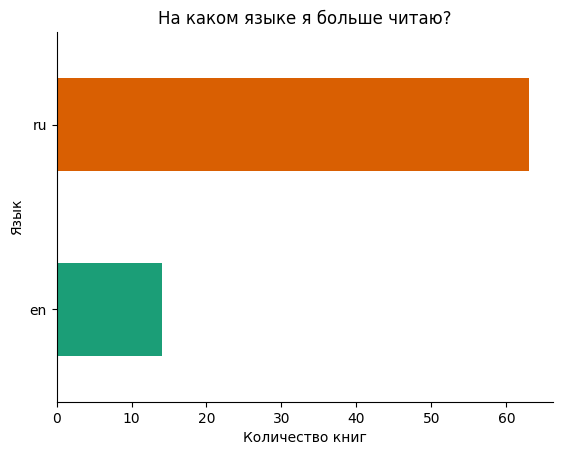

In [84]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel('Количество книг');
plt.ylabel('Язык');
plt.title('На каком языке я больше читаю?');

## Сохраню датафрейм на диске, чтобы не транжирить запросы к API

In [43]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/book_analyze/my_books.csv')

## Изучим и почистим данные

In [44]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book_analyze/my_books.csv')

In [57]:
df.isna().sum()

Unnamed: 0        0
id                0
title             0
authors           0
publisher         6
publishedDate    11
description       4
pageCount         5
imageLinks        1
language          0
dtype: int64

In [60]:
df

,id,title,authors,publisher,publishedDate,description,pageCount,imageLinks,language
0,4wooDwAAQBAJ,Как устроиться на работу своей мечты: от собес...,['Якуба Владимир Александрович'],"""Издательский дом """"Питер""""""",2017-05-04,"Вы знаете, сколько времени уходит на просмотр ...",160.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
1,Lsk-dirqTM8C,Как чашка за чашкой строилась Starbucks,"['Дори Джонс Йенг', 'Говард Шульц']",Альпина Паблишер,2012,Говард Шульц стал генеральным директором Starb...,288.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
2,yi0_DwAAQBAJ,О стойкости мудреца,"['Марк Аврелий, Эпиктет, Сенека']",Рипол Классик,2017-09-15,Стоицизм - поистине уникальная философская шко...,NaN,{'smallThumbnail': 'http://books.google.com/bo...,ru
3,dqB5DwAAQBAJ,Сила воли. Возьми свою жизнь под контроль,"['Джон Тирни', 'Рой Баумайстер']",Litres,2018-11-13,Хочешь быть счастливым – тренируй силу воли. И...,343.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
4,Qe4WEAAAQBAJ,Никаких правил,"['Рид Хастингс, Эрин Мейер']","""Манн, Иванов и Фербер""",NaN,"Книга о корпоративной культуре Netflix, котора...",386.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
...,...,...,...,...,...,...,...,...,...
72,DW1NDwAAQBAJ,Приключения Тома Сойера. С илл.,['Марк Твен'],Strelbytskyy Multimedia Publishing,2018-02-21,Имя необыкновенного американского писателя Мар...,NaN,{'smallThumbnail': 'http://books.google.com/bo...,ru
73,XdnhwgEACAAJ,Преступл и наказани : Crime and Punishmen,['Федор Достоевс'],Модн&#,2019-03-06,Русское классическое произведение великого пис...,648.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
74,SiiKCgAAQBAJ,Размножение в неволе,['Эстер Перель'],"""Манн, Иванов и Фербер""",NaN,"В этой книге ведущий эксперт по отношениям, пс...",240.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
75,0JcwEAAAQBAJ,"Байесовская статистика: Star Wars, LEGO, резин...",['Курт Уилл'],"""Издательский дом """"Питер""""""",2021-04-02,"Нужно решить конкретную задачу, а перед вами к...",304.0,{'smallThumbnail': 'http://books.google.com/bo...,ru


Удалим безымянную колонку из csv, дубликаты и пустые записи

In [58]:
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [42]:
df = df.drop_duplicates()

In [15]:
df = df.dropna(subset=['id'])

## Сколько страниц в прочитанных мной книгах?

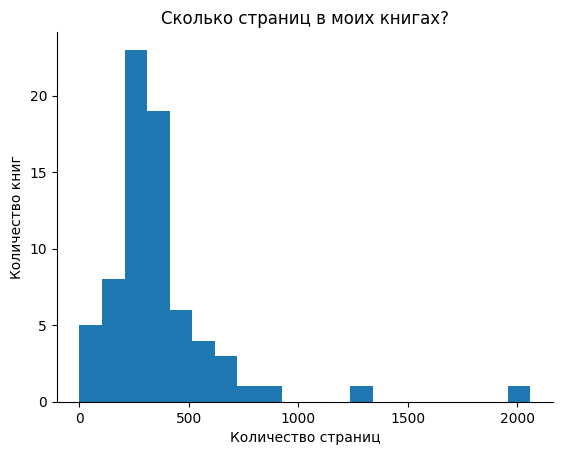

In [75]:
from matplotlib import pyplot as plt
import numpy as np

df['pageCount'].plot(kind='hist', bins=20, title='Сколько страниц в моих книгах?')
plt.gca().spines[['top', 'right',]].set_visible(False)


plt.xlabel('Количество страниц');
plt.ylabel('Количество книг');


## В каких книгах так много страниц?

In [48]:
df[df.pageCount > 1000]

,Unnamed: 0,id,title,authors,publisher,publishedDate,description,pageCount,imageLinks,language
32,33,28IOCQAAQBAJ,Эйнштейн. Его жизнь и его Вселенная,['Уолтер Айзексон'],Litres,2015-05-07,"Уолтер Айзексон, автор знаменитой биографии Ст...",1253.0,{'smallThumbnail': 'http://books.google.com/bo...,ru
35,36,RjNGDAAAQBAJ,Война и Мир. 4 тома в одной книге.,"['Толстой, Л.Н.', 'Лев Толстой']",Aegitas,2016-06-21,Предлагаем вниманию читателей одно из наиболее...,2060.0,{'smallThumbnail': 'http://books.google.com/bo...,ru


## Издательство

In [19]:
df.groupby('publisher').count().id

publisher
"Издательский дом ""Питер"""           2
"Манн, Иванов и Фербер"                2
Ad Marginem                            1
Aegitas                                2
Chicago Review Press                   2
Currency                               1
Hachette UK                            1
John Wiley & Sons                      2
Litres                                28
Little, Brown                          1
Oxford University Press                1
Penguin                                1
Simon and Schuster                     3
Strelbytskyy Multimedia Publishing     4
Альпина Паблишер                      23
БХВ-Петербург                          1
Модн&#                                 1
Рипол Классик                          1
Name: id, dtype: int64